## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [22]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\Deep-Learning-Car-Brand-master\Deep-Learning-Car-Brand-master\Datasets\Datasets\Train'
valid_path = 'C:\Deep-Learning-Car-Brand-master\Deep-Learning-Car-Brand-master\Datasets\Datasets\Test'


In [23]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [24]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [25]:
  # useful for getting number of output classes
folders = glob('C:\Deep-Learning-Car-Brand-master\Deep-Learning-Car-Brand-master\Datasets\Datasets\Train\*')

In [26]:
folders

['C:\\Deep-Learning-Car-Brand-master\\Deep-Learning-Car-Brand-master\\Datasets\\Datasets\\Train\\audi',
 'C:\\Deep-Learning-Car-Brand-master\\Deep-Learning-Car-Brand-master\\Datasets\\Datasets\\Train\\lamborghini',
 'C:\\Deep-Learning-Car-Brand-master\\Deep-Learning-Car-Brand-master\\Datasets\\Datasets\\Train\\mercedes']

In [27]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [28]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [29]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [30]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [35]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [36]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\hrith.DESKTOP-75K32P0\AppData\Local\Temp\ipykernel_55956\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 10s 6s/step - loss: 7.0368 - accuracy: 0.3281 - val_loss: 4.4302 - val_accuracy: 0.4828
Epoch 2/50
2/2 [==============================] - 7s 5s/step - loss: 4.5608 - accuracy: 0.4531 - val_loss: 6.9135 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 9s 7s/step - loss: 5.5512 - accuracy: 0.3906 - val_loss: 4.9814 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 9s 7s/step - loss: 2.8923 - accuracy: 0.4062 - val_loss: 2.4708 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 9s 7s/step - loss: 3.0111 - accuracy: 0.4844 - val_loss: 3.0851 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 10s 7s/step - loss: 2.4383 - accuracy: 0.4844 - val_loss: 2.2027 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 10s 7s/step - loss: 1.6385 - accuracy: 0.4219 - val_loss: 3.7082 - val_accuracy: 0.3276
Epoch 8/50
2/2 [======================

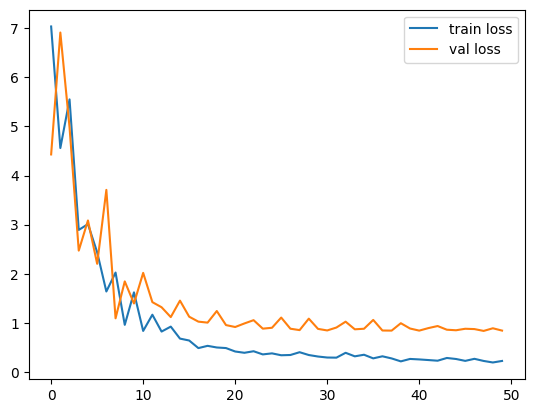

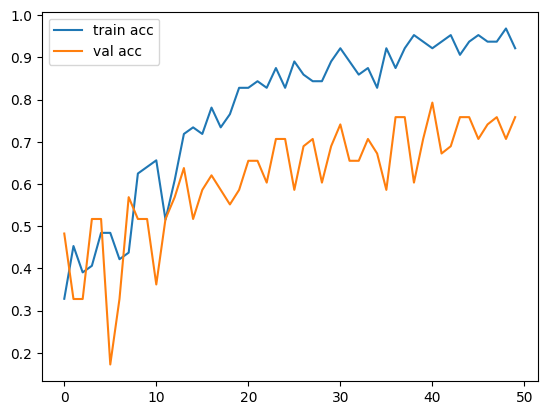

<Figure size 640x480 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [39]:

y_pred = model.predict(test_set)


2/2 [==============================] - 6s 2s/step


In [40]:
y_pred

array([[2.61754431e-02, 5.05282581e-01, 4.68541980e-01],
       [2.01479048e-01, 5.23438275e-01, 2.75082737e-01],
       [1.29626254e-02, 9.22104955e-01, 6.49324059e-02],
       [1.96829345e-02, 7.40833461e-01, 2.39483535e-01],
       [2.06814796e-01, 5.05923450e-01, 2.87261754e-01],
       [1.25852199e-02, 9.39086616e-01, 4.83282581e-02],
       [4.84177889e-03, 5.55536389e-01, 4.39621896e-01],
       [6.60855585e-06, 1.22610584e-03, 9.98767257e-01],
       [3.62096354e-02, 2.98868090e-01, 6.64922237e-01],
       [6.93356153e-04, 9.68882501e-01, 3.04241832e-02],
       [2.97238864e-02, 8.66932333e-01, 1.03343792e-01],
       [2.22259283e-01, 5.43003857e-01, 2.34736860e-01],
       [3.26331928e-02, 2.81629413e-01, 6.85737431e-01],
       [5.08270152e-02, 6.73799992e-01, 2.75372952e-01],
       [3.26113473e-03, 9.83648300e-01, 1.30905556e-02],
       [3.64388600e-02, 9.67584457e-03, 9.53885257e-01],
       [2.64522322e-02, 9.35821652e-01, 3.77261229e-02],
       [8.14918101e-01, 1.81321

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2], dtype=int64)

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [44]:
model=load_model('model_resnet50.h5')

In [45]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.02122196, 0.49325418, 0.4855238 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])